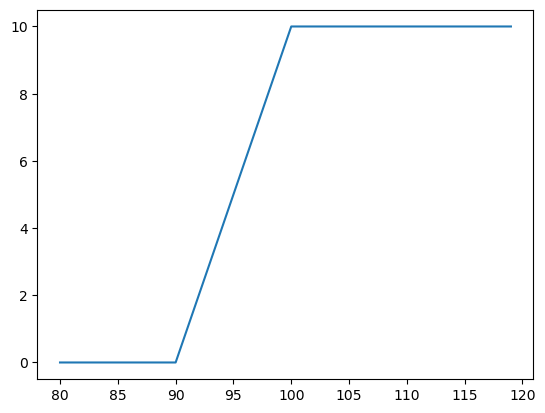

Euro callspread:  6.259190489574921
Amer callspread:  10.0


In [4]:
from enum import Enum
import math
import matplotlib.pyplot as plt

# Define PayoffType enumeration
class PayoffType(Enum):
    Call = 1
    Put = 2

# Binomial pricing model function
def crrBinomialG(S, r, vol, trade, n): # trade contain payoffType, K, T
    t = trade.expiry / n
    b = math.exp(vol * vol * t + r*t) + math.exp(-r * t)
    u = (b + math.sqrt(b*b - 4)) / 2
    p = (math.exp(r * t) - (1/u)) / (u - 1/u)
    vs = [trade.payoff(S * u**(n-i-i)) for i in range(n+1)]
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            nodeS = S*u**(i-j-j)
            continuation = math.exp(-r * t) * (vs[j] * p + vs[j+1] * (1-p))
            vs[j] = trade.valueAtNode(t*i, nodeS, continuation)
    return vs[0]


class EuropeanPayoff():
    def __init__(self, expiry, payoffFun):
        self.expiry = expiry
        self.payoffFun = payoffFun
    def payoff(self, S):
        return self.payoffFun(S)
    def valueAtNode(self, t, S, continuation):
        return continuation

class AmericanPayoff():
    def __init__(self, expiry, payoffFun):
        self.expiry = expiry
        self.payoffFun = payoffFun
    def payoff(self, S):
        return self.payoffFun(S)
    def valueAtNode(self, t, S, continuation):
        return max(self.payoff(S), continuation)
    
S, r, vol = 100, 0.05, 0.2
callSpread = lambda S: min(max(S-90, 0), 10)
plt.plot(range(80, 120), [callSpread(i) for i in range(80, 120)])
plt.show()

print("Euro callspread: ", crrBinomialG(S, r, vol, EuropeanPayoff(1, callSpread), 300))
print("Amer callspread: ", crrBinomialG(S, r, vol, AmericanPayoff(1, callSpread), 300))


## Call spread
- it is a call option trading strategy that involves buying and selling call options on the same asset with the same expiration date but different strike prices.  Typically, the call bought has a lower strike price than the call sold. This strategy is used when an investor expects a moderate increase in the price of the underlying asset.
- call spread definition
    - callSpread = lambda S: min(max(S-90, 0), 10)
    - buy call strike 90, sell call option strike 100
    - if underlying price at maturity < 90, call spread pnl = 0
    - if underlying price at maturity between 90 to 100, call spread pnl increase linearly
    - if underlying price at maturity >= 100, call spread pnl max at 10 which is the diff between 100-90=10
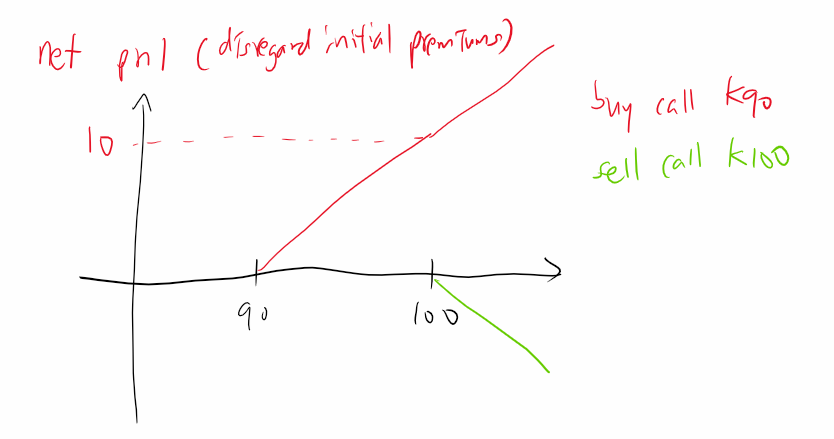

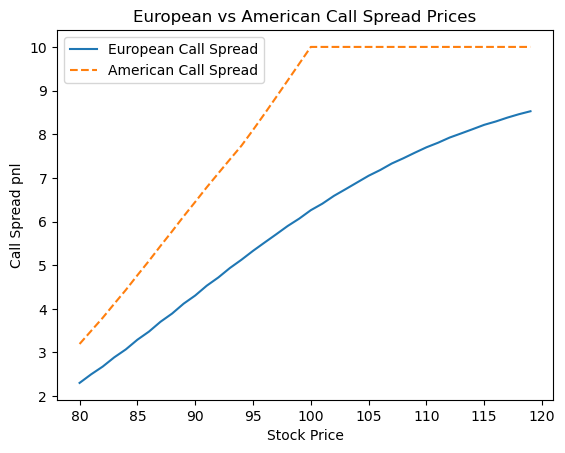

Euro callspread:  6.259190489574921
Amer callspread:  10.0


In [8]:
# Python code based on the provided script to plot a spot ladder of European and American call spread prices
from enum import Enum
import math
import matplotlib.pyplot as plt

# Define PayoffType enumeration
class PayoffType(Enum):
    Call = 1
    Put = 2

# Binomial pricing model function
def crrBinomialG(S, r, vol, trade, n): # trade contain payoffType, K, T
    t = trade.expiry / n
    b = math.exp(vol * vol * t + r*t) + math.exp(-r * t)
    u = (b + math.sqrt(b*b - 4)) / 2
    p = (math.exp(r * t) - (1/u)) / (u - 1/u)
    vs = [trade.payoff(S * u**(n-i-i)) for i in range(n+1)]
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            nodeS = S*u**(i-j-j)
            continuation = math.exp(-r * t) * (vs[j] * p + vs[j+1] * (1-p))
            vs[j] = trade.valueAtNode(t*i, nodeS, continuation)
    return vs[0]


class EuropeanPayoff():
    def __init__(self, expiry, payoffFun):
        self.expiry = expiry
        self.payoffFun = payoffFun
    def payoff(self, S):
        return self.payoffFun(S)
    def valueAtNode(self, t, S, continuation):
        return continuation

class AmericanPayoff():
    def __init__(self, expiry, payoffFun):
        self.expiry = expiry
        self.payoffFun = payoffFun
    def payoff(self, S):
        return self.payoffFun(S)
    def valueAtNode(self, t, S, continuation):
        return max(self.payoff(S), continuation)
    
# Set up the parameters for the model
S, r, vol = 100, 0.05, 0.2

# Define the call spread payoff function
callSpread = lambda S: min(max(S-90, 0), 10)

# Calculate prices for a range of stock prices for the spot ladder
stock_prices = range(80, 120)
euro_prices = [crrBinomialG(s, r, vol, EuropeanPayoff(1, callSpread), 300) for s in stock_prices]
amer_prices = [crrBinomialG(s, r, vol, AmericanPayoff(1, callSpread), 300) for s in stock_prices]

# Plot the European and American call spread prices
plt.plot(stock_prices, euro_prices, label='European Call Spread')
plt.plot(stock_prices, amer_prices, label='American Call Spread', linestyle='--')

# Labeling the plot
plt.xlabel('Stock Price')
plt.ylabel('Call Spread pnl')
plt.title('European vs American Call Spread Prices')
plt.legend()

# Show the plot
plt.show()

# Print out the prices for the current stock price
print("Euro callspread: ", crrBinomialG(S, r, vol, EuropeanPayoff(expiry, callSpread), n))
print("Amer callspread: ", crrBinomialG(S, r, vol, AmericanPayoff(expiry, callSpread), n))

